In [5]:
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Methodology of Scoring Semantic Similarity

* In this section, we outline the methodology for scoring reviews based on their semantic similarity to our predefined list of emotions. As a preliminary trial, we have selected 27 reviews from two different beers featured on a single website.

In [ ]:
!pip install sentence-transformers

> In our case, the model that best shows the difference between joy and sadness is model 3 which is *paraphrase-multilingual-MiniLM-L12-v2*

# Calculating emotion scores of BA Dataset
The reviews were embedded in batches using Colab since it takes hours working with transformers.

In [ ]:
# Load your DataFrame
file_path = '/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_48001_50000.csv'
df = pd.read_csv(file_path)

In [ ]:
df['review_id'] = range(1, len(df) + 1)

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

def score_emotions(df, start_index, end_index):
    # Extract the reviews from the specified range
    reviews = df['text'][start_index:end_index].tolist()

    # Load the model
    model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
    emotions = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']

    # Embed the reviews
    review_embeddings = model.encode(reviews, convert_to_tensor=True)

    # Compute and add scores for each emotion
    for emotion in emotions:
        emotion_embedding = model.encode([emotion], convert_to_tensor=True)
        scores = util.cos_sim(review_embeddings, emotion_embedding)
        # Add the scores to the original DataFrame in the corresponding range
        df.loc[start_index:end_index-1, f'{emotion}_score'] = [score[0] for score in scores]

    return df

In [ ]:
# Define the range for processing reviews in batches of 1000
start_index = 100000
end_index = 150001
batch_size = 1000

# Loop through the DataFrame in batches of 1000
for i in range(start_index, end_index, batch_size):
    s = i
    k = min(i + batch_size, end_index)  # Ensure we don't go past the end_index

    # Process the batch
    df_updated = score_emotions(df, s, k)

    # Save the processed batch to a CSV file
    file_name = f'/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_{s}_{k}.csv'
    df_updated.to_csv(file_name, index=False)

    print(f"Batch {s}-{k} processed and saved to {file_name}")

Batch 150000-150001 processed and saved to /content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_10000_10001.csv


Same process is applied for rb_dataset and scores are saved.



### Checking if any reviews are missing without score




In [ ]:
df_updated.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba.csv', index=False)

In [ ]:
score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']

# Check for NaN values in the score columns
nan_check = df[score_columns].isna().any()

# Display the result
print(nan_check)

joy_score         False
sadness_score     False
anger_score       False
fear_score        False
love_score        False
surprise_score    False
dtype: bool


# Analysis for distribution of the reviews' emotion scores


In [7]:
# Load 2 reviews dataframe with emotion scores
file_path_ba = '/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba.csv'
df_ba = pd.read_csv(file_path_ba)

file_path_rb = '/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_rb.csv'
df_rb = pd.read_csv(file_path_rb)

In [8]:
# List of emotion score column names
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']

# Calculate the standard deviation for each emotion score in df_ba
std_dev_ba = df_ba[emotion_score_columns].std()

# Calculate the standard deviation for each emotion score in df_rb
std_dev_rb = df_rb[emotion_score_columns].std()

# Display the results
print("Standard Deviation in df_ba:")
print(std_dev_ba)
print("\nStandard Deviation in df_rb:")
print(std_dev_rb)

Standard Deviation in df_ba:
joy_score         0.094991
sadness_score     0.097268
anger_score       0.092141
fear_score        0.082006
love_score        0.121734
surprise_score    0.097446
dtype: float64

Standard Deviation in df_rb:
joy_score         0.074621
sadness_score     0.070832
anger_score       0.073188
fear_score        0.061155
love_score        0.075345
surprise_score    0.068854
dtype: float64


In [14]:
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']
df_ba[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,276902.000000,276902.000000,276902.000000,276902.000000,276902.000000,276902.000000
mean,0.198742,0.092701,0.132447,0.092857,0.129526,0.206171
std,0.094991,0.097268,0.092141,0.082006,0.121734,0.097446
min,-0.131700,-0.237952,-0.202736,-0.156734,-0.219666,-0.128802
25%,0.139390,0.031668,0.070544,0.041556,0.061714,0.146340
50%,0.195367,0.079662,0.120548,0.078604,0.105549,0.195844
75%,0.252065,0.130251,0.176556,0.121054,0.152985,0.245985
max,0.786640,0.830390,0.710836,0.610945,0.747191,0.871854


In [15]:
df_rb[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,1.013187e+06,1.013187e+06,1.013187e+06,1.013187e+06,1.013187e+06,1.013187e+06
mean,2.192368e-01,9.336341e-02,1.330116e-01,8.058203e-02,1.355540e-01,1.887978e-01
std,7.462107e-02,7.083192e-02,7.318815e-02,6.115511e-02,7.534545e-02,6.885371e-02
min,-1.590192e-01,-2.257604e-01,-1.377345e-01,-1.668414e-01,-1.904707e-01,-1.276139e-01
25%,1.724147e-01,4.740001e-02,8.266028e-02,4.025750e-02,8.996349e-02,1.458579e-01
50%,2.203681e-01,8.989641e-02,1.285741e-01,7.461797e-02,1.315422e-01,1.872683e-01
75%,2.679291e-01,1.329282e-01,1.781539e-01,1.125535e-01,1.736001e-01,2.291456e-01
max,7.036326e-01,7.410147e-01,6.281847e-01,6.559164e-01,8.722703e-01,9.358571e-01


* **Given that the standard deviations are relatively low, indicating consistency in the scores, we can confidently proceed with averaging the scores for each beer and subsequently for each beer style.**

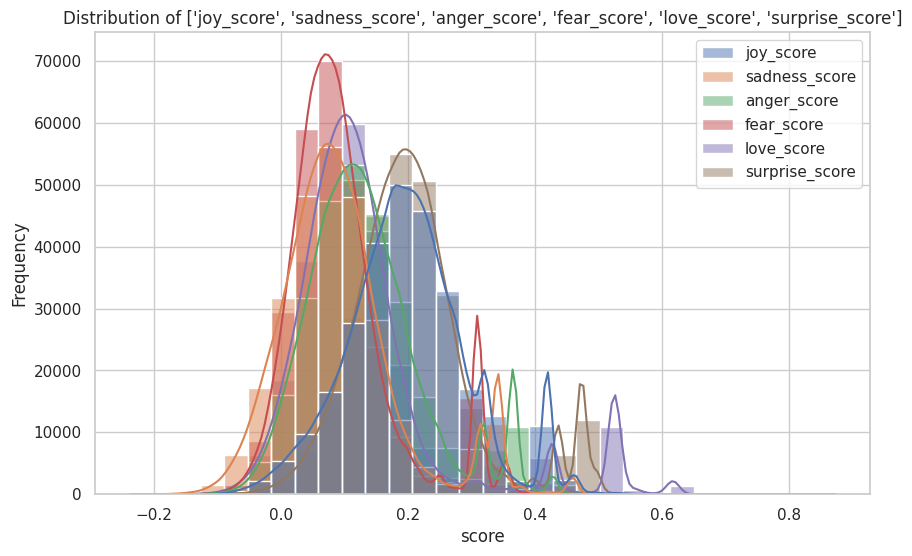

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot histograms for each score column

plt.figure(figsize=(10, 6))
sns.histplot(df_ba[emotion_score_columns], kde=True, bins=30)
plt.title(f'Distribution of {emotion_score_columns}')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

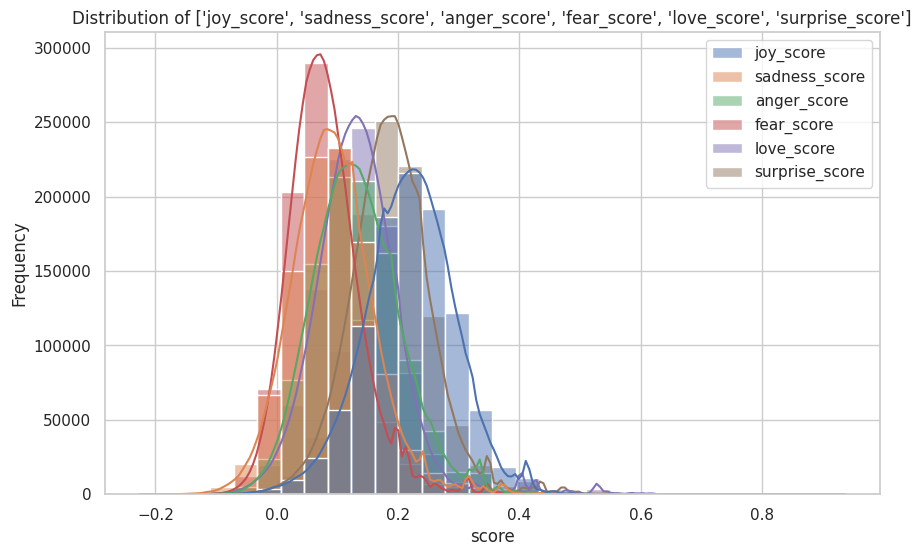

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot histograms for each score column

plt.figure(figsize=(10, 6))
sns.histplot(df_rb[emotion_score_columns], kde=True, bins=30)
plt.title(f'Distribution of {emotion_score_columns}')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

# Calculating average scores for each beer


In [29]:
df_ba.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review', 'joy_score',
       'sadness_score', 'anger_score', 'fear_score', 'love_score',
       'surprise_score', 'review_id'],
      dtype='object')

In [32]:
df_rb.columns

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'joy_score', 'sadness_score',
       'anger_score', 'fear_score', 'love_score', 'surprise_score'],
      dtype='object')

In [34]:
unique_styles = df_ba['style'].unique()
unique_style_count = df_ba['style'].nunique()
print(f"Number of unique styles: {unique_style_count}")

unique_styles = df_rb['style'].unique()
unique_style_count = df_rb['style'].nunique()
print(f"Number of unique styles: {unique_style_count}")

Number of unique styles: 104
Number of unique styles: 80


In [38]:
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']
average_emotion_scores = df_ba.groupby('beer_id')[emotion_score_columns].mean()
print(average_emotion_scores)


         joy_score  sadness_score  anger_score  fear_score  love_score  \
beer_id                                                                  
12        0.186459       0.117452     0.190158    0.135688    0.139969   
21        0.190012       0.117118     0.176162    0.127905    0.138719   
24        0.189955       0.111605     0.170734    0.104450    0.119913   
26        0.229737       0.114719     0.135085    0.108457    0.146479   
27        0.206573       0.110742     0.155279    0.095813    0.134573   
...            ...            ...          ...         ...         ...   
292318    0.230841       0.027629     0.153431    0.025572    0.184005   
292618    0.259490       0.112259     0.131314    0.110586    0.176124   
292702    0.106913      -0.021323     0.072902    0.016493    0.021000   
292756    0.191794       0.118967     0.136266    0.118631    0.188332   
292959    0.064803       0.075752     0.067344    0.060230    0.075038   

         surprise_score  
beer_id    

In [36]:
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']
average_emotion_scores = df_rb.groupby('beer_id')[emotion_score_columns].mean()
print(average_emotion_scores)
average_emotion_scores.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_rb_for_beers.csv', index=False)

         joy_score  sadness_score  anger_score  fear_score  love_score  \
beer_id                                                                  
3         0.213304       0.080342     0.113798    0.074598    0.123924   
13        0.203673       0.089290     0.138947    0.068812    0.120468   
14        0.233359       0.089430     0.119604    0.063544    0.121999   
15        0.221652       0.114838     0.160027    0.083717    0.136479   
57        0.240076       0.100563     0.132664    0.076903    0.123478   
...            ...            ...          ...         ...         ...   
535690    0.174083       0.117045     0.207317    0.062256    0.104644   
535735    0.290839       0.115623     0.101675    0.019386    0.167425   
535768    0.214710       0.061119     0.014434    0.037043    0.118228   
535794    0.239918       0.074849     0.085205    0.016532    0.128299   
536273    0.177584       0.140520     0.214951    0.145305    0.159409   

         surprise_score  
beer_id    

In [ ]:
unique_styles_per_beer = df_ba.groupby('beer_id')['style'].nunique()
if (unique_styles_per_beer > 1).any():
    print("Some beer_ids have more than one style associated with them.")
else:
    print("Each beer_id is associated with a unique style.")

Each beer_id is associated with a unique style.


In [35]:
unique_styles_per_beer = df_rb.groupby('beer_id')['style'].nunique()
if (unique_styles_per_beer > 1).any():
    print("Some beer_ids have more than one style associated with them.")
else:
    print("Each beer_id is associated with a unique style.")

Each beer_id is associated with a unique style.


In [39]:
# Group by 'beer_id' and calculate the mean of the emotion scores
emotion_scores_ba_for_beers = df_ba.groupby('beer_id')[emotion_score_columns].mean()

# Add the 'style' column
emotion_scores_ba_for_beers['style'] = df_ba.drop_duplicates('beer_id').set_index('beer_id')['style']

# Display the result
print(emotion_scores_ba_for_beers)

emotion_scores_ba_for_beers.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_for_beers.csv', index=False)

         joy_score  sadness_score  anger_score  fear_score  love_score  \
beer_id                                                                  
12        0.186459       0.117452     0.190158    0.135688    0.139969   
21        0.190012       0.117118     0.176162    0.127905    0.138719   
24        0.189955       0.111605     0.170734    0.104450    0.119913   
26        0.229737       0.114719     0.135085    0.108457    0.146479   
27        0.206573       0.110742     0.155279    0.095813    0.134573   
...            ...            ...          ...         ...         ...   
292318    0.230841       0.027629     0.153431    0.025572    0.184005   
292618    0.259490       0.112259     0.131314    0.110586    0.176124   
292702    0.106913      -0.021323     0.072902    0.016493    0.021000   
292756    0.191794       0.118967     0.136266    0.118631    0.188332   
292959    0.064803       0.075752     0.067344    0.060230    0.075038   

         surprise_score              

In [40]:
# Group by 'beer_id' and calculate the mean of the emotion scores
emotion_scores_rb_for_beers = df_rb.groupby('beer_id')[emotion_score_columns].mean()

# Add the 'style' column
emotion_scores_rb_for_beers['style'] = df_rb.drop_duplicates('beer_id').set_index('beer_id')['style']

# Display the result
print(emotion_scores_rb_for_beers)

emotion_scores_rb_for_beers.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_rb_for_beers.csv', index=False)

         joy_score  sadness_score  anger_score  fear_score  love_score  \
beer_id                                                                  
3         0.213304       0.080342     0.113798    0.074598    0.123924   
13        0.203673       0.089290     0.138947    0.068812    0.120468   
14        0.233359       0.089430     0.119604    0.063544    0.121999   
15        0.221652       0.114838     0.160027    0.083717    0.136479   
57        0.240076       0.100563     0.132664    0.076903    0.123478   
...            ...            ...          ...         ...         ...   
535690    0.174083       0.117045     0.207317    0.062256    0.104644   
535735    0.290839       0.115623     0.101675    0.019386    0.167425   
535768    0.214710       0.061119     0.014434    0.037043    0.118228   
535794    0.239918       0.074849     0.085205    0.016532    0.128299   
536273    0.177584       0.140520     0.214951    0.145305    0.159409   

         surprise_score              

In [41]:
# Group by 'beer_id' and calculate the mean of the emotion scores
emotion_scores_ba_for_styles = emotion_scores_ba_for_beers.groupby('style')[emotion_score_columns].mean()

# Display the result
print(emotion_scores_ba_for_styles)

emotion_scores_ba_for_styles.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_ba_for_beer_styles.csv', index=False)

                            joy_score  sadness_score  anger_score  fear_score  \
style                                                                           
Altbier                      0.196298       0.098739     0.148250    0.092883   
American Adjunct Lager       0.170932       0.060593     0.096242    0.074346   
American Amber / Red Ale     0.193949       0.097813     0.152243    0.090014   
American Amber / Red Lager   0.183529       0.081462     0.135696    0.082171   
American Barleywine          0.178782       0.081599     0.133608    0.083311   
...                               ...            ...          ...         ...   
Vienna Lager                 0.186454       0.090872     0.129746    0.089005   
Weizenbock                   0.190199       0.088667     0.124013    0.095258   
Wheatwine                    0.166853       0.070940     0.124784    0.075092   
Winter Warmer                0.199746       0.104554     0.148695    0.095947   
Witbier                     

In [42]:
# Group by 'beer_id' and calculate the mean of the emotion scores
emotion_scores_rb_for_styles = emotion_scores_rb_for_beers.groupby('style')[emotion_score_columns].mean()

# Display the result
print(emotion_scores_rb_for_styles)

emotion_scores_rb_for_styles.to_csv('/content/drive/MyDrive/ADA - Project/NLP/emotion_scores_rb_for_beer_styles.csv', index=False)

                         joy_score  sadness_score  anger_score  fear_score  \
style                                                                        
Abbey Dubbel              0.203365       0.080878     0.126024    0.075817   
Abbey Tripel              0.227110       0.077330     0.102070    0.069071   
Abt/Quadrupel             0.205601       0.077203     0.116924    0.074061   
Altbier                   0.208427       0.101544     0.156289    0.084493   
Amber Ale                 0.212017       0.103296     0.158536    0.081056   
...                            ...            ...          ...         ...   
Traditional Ale           0.216218       0.093366     0.126005    0.076633   
Weizen Bock               0.216117       0.073179     0.113643    0.072502   
Wheat Ale                 0.219954       0.076995     0.099026    0.057167   
Witbier                   0.225974       0.076901     0.094422    0.065138   
Zwickel/Keller/Landbier   0.222747       0.093643     0.123809  

In [ ]:
emotion_scores_ba_for_styles

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
style,,,,,,
Altbier,0.196298,0.098739,0.148250,0.092883,0.127143,0.207595
American Adjunct Lager,0.170932,0.060593,0.096242,0.074346,0.093940,0.180464
American Amber / Red Ale,0.193949,0.097813,0.152243,0.090014,0.127163,0.204509
American Amber / Red Lager,0.183529,0.081462,0.135696,0.082171,0.116557,0.194319
American Barleywine,0.178782,0.081599,0.133608,0.083311,0.117468,0.202873
...,...,...,...,...,...,...
Vienna Lager,0.186454,0.090872,0.129746,0.089005,0.125344,0.195564
Weizenbock,0.190199,0.088667,0.124013,0.095258,0.129649,0.218904
Wheatwine,0.166853,0.070940,0.124784,0.075092,0.110883,0.196214


from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['joy_score'].plot(kind='hist', bins=20, title='joy_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['sadness_score'].plot(kind='hist', bins=20, title='sadness_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['anger_score'].plot(kind='hist', bins=20, title='anger_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['fear_score'].plot(kind='hist', bins=20, title='fear_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles.plot(kind='scatter', x='joy_score', y='sadness_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles.plot(kind='scatter', x='sadness_score', y='anger_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles.plot(kind='scatter', x='anger_score', y='fear_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles.plot(kind='scatter', x='fear_score', y='love_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['joy_score'].plot(kind='line', figsize=(8, 4), title='joy_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['sadness_score'].plot(kind='line', figsize=(8, 4), title='sadness_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['anger_score'].plot(kind='line', figsize=(8, 4), title='anger_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
emotion_scores_ba_for_styles['fear_score'].plot(kind='line', figsize=(8, 4), title='fear_score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [43]:
emotion_scores_rb_for_styles

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
style,,,,,,
Abbey Dubbel,0.203365,0.080878,0.126024,0.075817,0.130389,0.198102
Abbey Tripel,0.227110,0.077330,0.102070,0.069071,0.138369,0.189992
Abt/Quadrupel,0.205601,0.077203,0.116924,0.074061,0.121775,0.193606
Altbier,0.208427,0.101544,0.156289,0.084493,0.139425,0.198127
Amber Ale,0.212017,0.103296,0.158536,0.081056,0.141567,0.195680
...,...,...,...,...,...,...
Traditional Ale,0.216218,0.093366,0.126005,0.076633,0.134215,0.196912
Weizen Bock,0.216117,0.073179,0.113643,0.072502,0.128102,0.191155
Wheat Ale,0.219954,0.076995,0.099026,0.057167,0.123282,0.181510


# Analysis for the Averaged Emotion Scores

In [58]:
df_ba = emotion_scores_ba_for_beers
df_rb = emotion_scores_rb_for_beers

In [46]:
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']
df_ba[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000
mean,0.197487,0.088633,0.133088,0.087085,0.124969,0.199587
std,0.049585,0.051310,0.051319,0.043207,0.061057,0.051034
min,-0.039509,-0.123002,-0.054681,-0.105246,-0.057977,0.002449
25%,0.168251,0.057765,0.099644,0.059942,0.088345,0.169565
50%,0.196911,0.086346,0.131118,0.084378,0.117484,0.198768
75%,0.224462,0.113459,0.162248,0.108165,0.147591,0.225092
max,0.485843,0.458822,0.428331,0.355499,0.617025,0.495412


In [47]:
df_rb[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,34824.000000,34824.000000,34824.000000,34824.000000,34824.000000,34824.000000
mean,0.219788,0.092923,0.135213,0.076357,0.135578,0.190047
std,0.036126,0.033584,0.041917,0.030770,0.035318,0.031248
min,0.015874,-0.070648,-0.019674,-0.057363,-0.029910,0.001276
25%,0.197978,0.073378,0.106494,0.057677,0.115462,0.172837
50%,0.219527,0.093348,0.134127,0.076184,0.135028,0.189717
75%,0.241923,0.112013,0.162663,0.094245,0.154133,0.207128
max,0.441784,0.358644,0.350297,0.283932,0.500005,0.446975


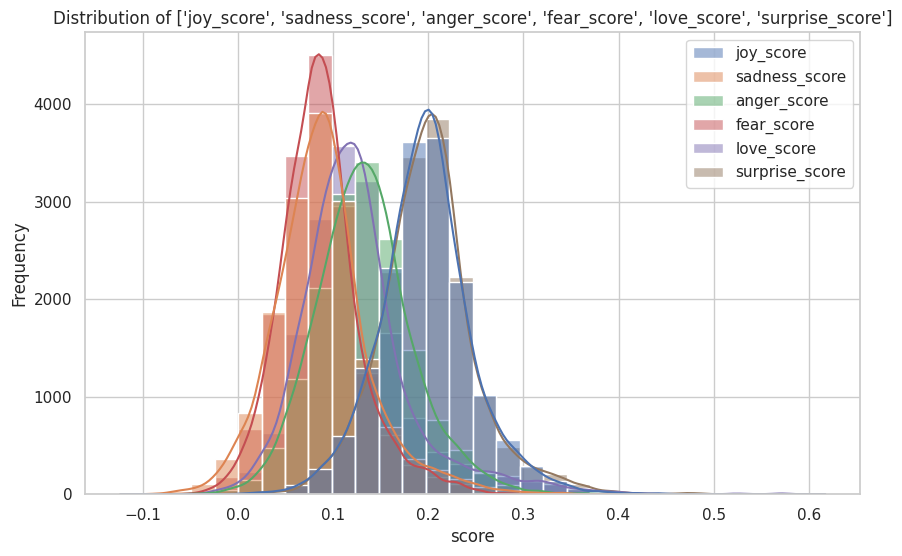

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot histograms for each score column

plt.figure(figsize=(10, 6))
sns.histplot(df_ba[emotion_score_columns], kde=True, bins=30)
plt.title(f'Distribution of {emotion_score_columns}')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

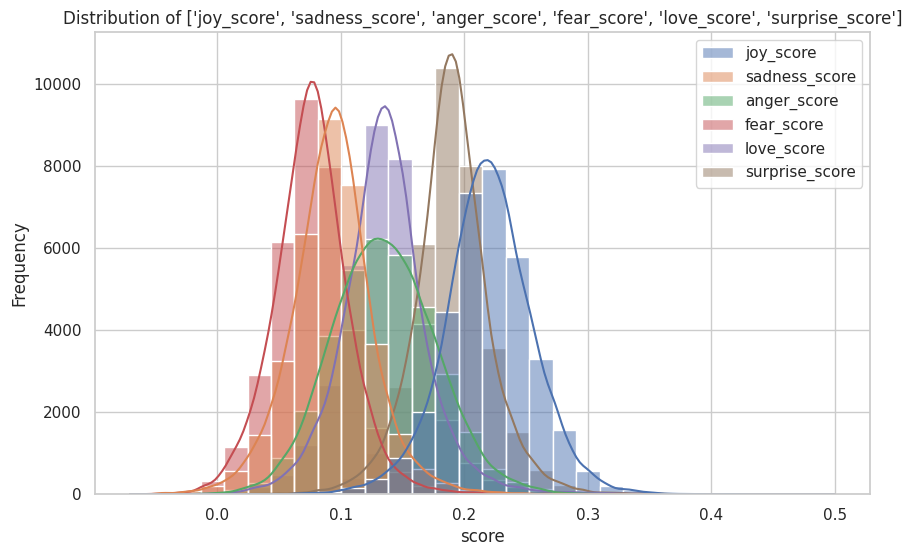

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot histograms for each score column

plt.figure(figsize=(10, 6))
sns.histplot(df_rb[emotion_score_columns], kde=True, bins=30)
plt.title(f'Distribution of {emotion_score_columns}')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

In [50]:
#for styles

In [53]:
df_ba = emotion_scores_ba_for_styles
df_rb = emotion_scores_rb_for_styles

In [54]:
emotion_score_columns = ['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score', 'surprise_score']
df_ba[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.191256,0.086937,0.129628,0.087787,0.122480,0.201175
std,0.011561,0.015510,0.023930,0.014419,0.011762,0.015884
min,0.164363,0.010803,0.032230,0.002181,0.080038,0.083598
25%,0.182048,0.078611,0.113253,0.079988,0.116247,0.195220
50%,0.191403,0.088781,0.133426,0.089903,0.123741,0.202419
75%,0.198653,0.097737,0.148323,0.096111,0.129402,0.208372
max,0.214981,0.114698,0.181088,0.112229,0.149393,0.228116


In [55]:
df_rb[emotion_score_columns].describe()

,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,0.215371,0.091833,0.133136,0.077332,0.134530,0.192070
std,0.012042,0.011024,0.026033,0.011154,0.008509,0.008389
min,0.189690,0.062564,0.073715,0.056440,0.114947,0.176800
25%,0.205776,0.083595,0.115505,0.070361,0.130287,0.185540
50%,0.215739,0.094493,0.129814,0.076019,0.134393,0.192022
75%,0.224100,0.099099,0.155252,0.085396,0.139029,0.196730
max,0.239506,0.124284,0.193338,0.104382,0.168004,0.216665


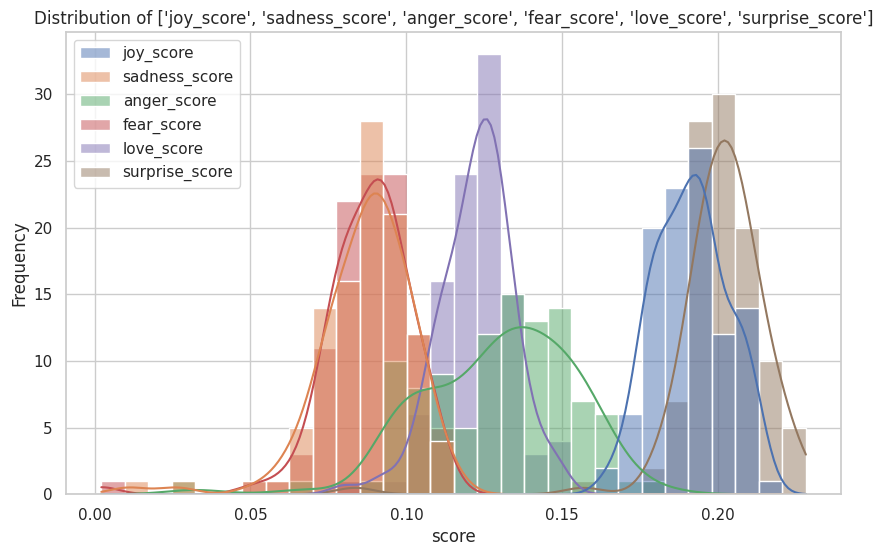

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot histograms for each score column

plt.figure(figsize=(10, 6))
sns.histplot(df_ba[emotion_score_columns], kde=True, bins=30)
plt.title(f'Distribution of {emotion_score_columns}')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()

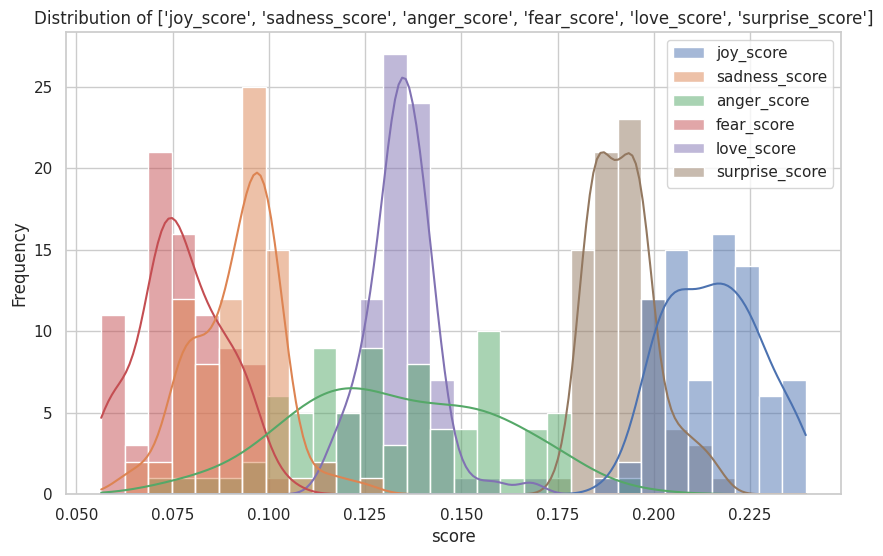

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plot histograms for each score column

plt.figure(figsize=(10, 6))
sns.histplot(df_rb[emotion_score_columns], kde=True, bins=30)
plt.title(f'Distribution of {emotion_score_columns}')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.show()